# Problem set 4 solutions accompanyment

This notebook accompanies the solutions to problem set 4. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

## Q4a Sketching of solutions

The problem set gives you a graph of the RHS of an ODE and asks you to sketch different solutions. This can be done by hand but here we show how it can be done numerically. The point is that because this is phase line analysis, then the solution must only be increasing or decreasing monotonically. 

In parts b and c, the question asks you to investigate for different values of 'C' and 'gamma'. In order to provide this flexibility, we will define some of the functions below to accept gamma as an argument.

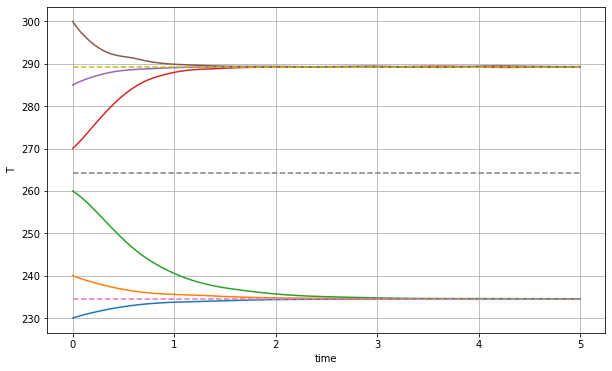

In [16]:
Q = 342; sigma = 5.67e-8; 
a = lambda T: 0.5 - 0.2*np.tanh(0.1*(T-265));
G = lambda T, gam: (Q*(1-a(T)) - sigma*gam*T**4)

# Approximate steady states for the case of C = 1 and gamma = 0.6
gam = 0.6;
fwd = lambda T: G(T, gam)
sol = root(fwd, [230]); T1 = sol.x[0];
sol = root(fwd, [265]); T2 = sol.x[0];
sol = root(fwd, [287]); T3 = sol.x[0];

# print(T1)

# Create a function file for the ODE solve
tmax = 5
plt.figure(figsize=(10,6))
def solveit(T0, C, gam):
    # In order to specify the ODE we need a function defined on two elements (t, T); we pass through the dummy variables
    # So first pass through the parameters of C and gamma
    Gode = lambda t, T: 1/C*G(T, gam) 
    sol = solve_ivp(Gode, [0, tmax], [T0], dense_output=True)
    # Plot on a denser mesh
    t = np.linspace(0, tmax, 200)
    T = sol.sol(t); T = T[0];
    plt.plot(t, T)
    
C = 1; gam = 0.6;
solveit(230, C, gam)
solveit(240, C, gam)
solveit(260, C, gam)
solveit(270, C, gam)
solveit(285, C, gam)
solveit(300, C, gam)

plt.plot([0, tmax], [T1, T1], '--')
plt.plot([0, tmax], [T2, T2], '--')
plt.plot([0, tmax], [T3, T3], '--')
plt.grid(1)
plt.xlabel('time');
plt.ylabel('T');

## Q3b

In this part you are asked to plot the solution with initial condition T(0) = 285, and then to consider what happens if 'C' is changed. The key is that as 'C' increases in value, the rate of change scales as 1/C. Therefore this has the effect of slowing down the approach of the solution to the nearest steady state near T = 290. 

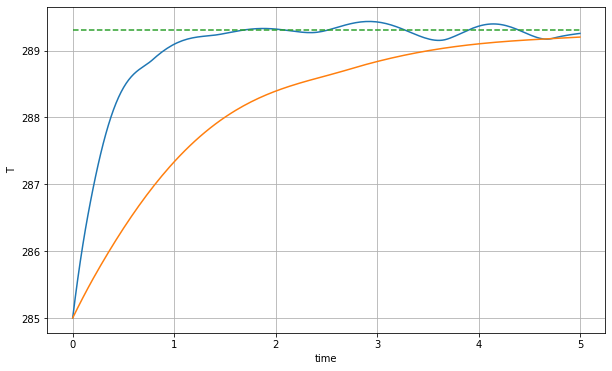

In [18]:
plt.figure(figsize=(10,6))

C = 1; gam = 0.6;
solveit(285, C, gam)
C = 4;
solveit(285, C, gam,)
plt.plot([0, tmax], [T3, T3], '--')
plt.grid(1)
plt.xlabel('time');
plt.ylabel('T');

## Q3c 

Now the question asks for you to investigate for changing gamma. First, examine what happens if gamma is changed in the RHS of the ODE. 

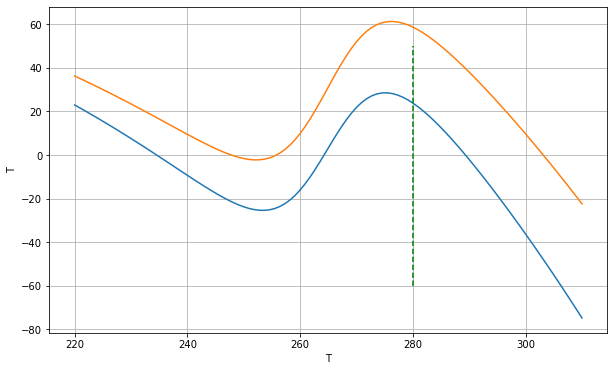

In [34]:
T = np.linspace(220, 310, 100);

plt.figure(figsize=(10,6))
plt.plot(T, G(T, 0.6))
plt.plot(T, G(T, 0.5))
plt.plot([280, 280], [-60, 50], 'g--')
plt.xlabel('T')
plt.ylabel('T')
plt.grid(1)

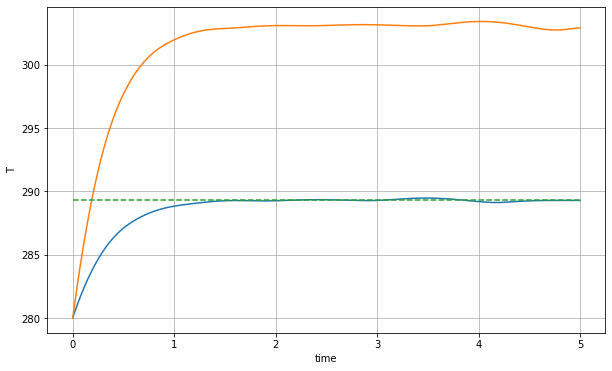

In [35]:
plt.figure(figsize=(10,6))
solveit(280, 1, 0.6)
solveit(280, 1, 0.5)
plt.plot([0, tmax], [T3, T3], '--')
plt.grid(1)
plt.xlabel('time');
plt.ylabel('T');

## Q6b 

Using Python, plot a graph of the steady-state temperature as a function of the ice line location, which satisfies the equation 

$$
\bar{T}^* = \frac{Q(1 - \bar{a})}{B}.
$$

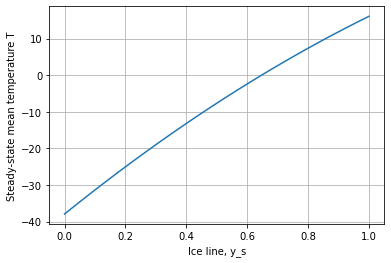

In [8]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q = 342.0 # solar constant (1380 W/m^2 divided by 4)


# Code in the abar value from part a
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.482/2*(ys**1 - 1))
# Make a mesh of points and plot
ys = np.linspace(0, 1, 50)
Tbar_exact = (Q*(1 - abar(ys)) - A)/B
plt.plot(ys, Tbar_exact)
plt.grid(1); plt.xlabel('Ice line, y_s'); 
plt.ylabel('Steady-state mean temperature T');


# Q6b 

Previously `courses/MA30287/notebooks/lecture17-LatitudeEBM-Newton.ipynb` we used a numerical integration scheme to calculate the mean temperature. We wish to compare how accurate our numerical integrator is to the exact solution.

Annoyingly, we should re-run the scripts from the code above to compare. The below is copied and pasted from the Lecture 17 code. 

The solution converged.


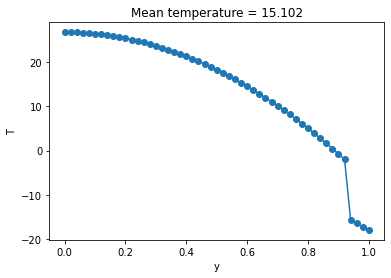

In [10]:
def Tbar(y, T):
    # Riemann sum approximation of the integral T(y) over y    
    I = 0
    for i in range(0, np.size(y)-1):
        dy = y[i+1] - y[i]
        I = I + T[i]*dy
        # print(i, yi, T[i])
        # I = I + 0.5*(T[i] + T[i+1])*dy
    return I

def afunc(T): 
    # albedo function; if T > Tc, set a = aw, elseif T < Tc, a = ai
    a = 0*T
    for i, TT in enumerate(T):
        if TT < Tc:
            aa = ai
        elif TT > Tc:
            aa = aw
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

def myPhi(T, y):
    Tb = Tbar(y, T)
    Phi = (k*Tb + Q*s(y)*(1 - afunc(T)) - A)/(B+k)
    return Phi

# Initialise the mesh with N points
N = 51
y = np.linspace(0, 1, N)

# Iterative scheme
# Form an initial guess 
Tequator = 20; Tpole = -12;
T = Tequator + (Tpole - Tequator)*y

# Run the solver
fwd = lambda T: T - myPhi(T, y)
sol = root(fwd, T)
print(sol.message)

# Plot the output
solT = sol.x;
fig = plt.figure(figsize=(6,4))
plt.plot(y, solT, '-o')
plt.xlabel('y'); plt.ylabel('T')
plt.title("Mean temperature = %1.3f" % Tbar(y, solT));

Once you have done the above and re-run the script, you should have a temperature function T(y). The approximated mean temperature is the integral 
$$
\int_0^1 T(y) dy \approx \sum_{i=0}^{N-1} T_i (y_{i+1} - y_i).
$$
The approximated mean temperature has already been given in the title of the above figure. But we can see it's value:

In [11]:
Tbar(y, solT)

15.101913950315778

Now calculating the exact mean temperature is a bit troublesome. The problem is that it relies on knowing the ice-line position, but in fact we don't know the ice line position from the numerical scheme above! (you can see it is somewhere around 0.95).

Using the script [studied in lecture 19/20](https://maths.jupyterhub.bath.ac.uk/hub/user-redirect/lab/tree/courses/MA30287/notebooks/lecture19-LatitudeEBM-iceline.ipynb), we can calculate the ice line position for Q = 342. It yields

$$
y_s \approx 0.9395\ldots
$$

In [13]:
(Q*(1 - abar(0.9395)) - A)/B

13.556923032815801

So the mean temperature, calculated the approximate way (around 15 degrees) is about a degree off from the exact.